In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate 
import sympy 

\begin{align}
\frac{A_{square}} {A_{circle}} &= \frac{(2rad)^2}{\pi \times rad^2} \\
\pi &= \frac{(2rad)^2}{rad^2} \times \frac {A_{circle}} {A_{square}} \\
\pi &= \frac{(2rad)^2}{rad^2} \times \frac {N_{circle}} {N_{square}}
\end{align}

* $N$ is the number of dots in a square or a circle

In [2]:
inCirc = 0
trial = 1000
rad = 2
x0 = 1
y0 = 15
x_circ = []; y_circ = []
x_sq = []; y_sq = []

for i in range(1,trial):
    x = np.random.uniform(x0-rad,x0+rad)
    y = np.random.uniform(y0-rad,y0+rad)
    if ((x-x0)**2 + (y-y0)**2 <= rad**2):
        inCirc += 1
        x_circ.append(x); y_circ.append(y)
    else:
        x_sq.append(x); y_sq.append(y)

print("Estimated Prob = %.5f" %(inCirc/trial))
print("Real Prob = %.5f" %(np.pi*rad**2/((2*rad)**2))) 

print("Estimated Area = %.5f" %( ((2*rad)**2)*(inCirc/trial) ))
print("Real Area = %.5f" %(np.pi*rad**2))

print("Estimated PI = %.5f" %(((2*rad)**2)*(inCirc/trial)/rad**2))
print("Real PI = %.5f" %(np.pi)) 

Estimated Prob = 0.78000
Real Prob = 0.78540
Estimated Area = 12.48000
Real Area = 12.56637
Estimated PI = 3.12000
Real PI = 3.14159


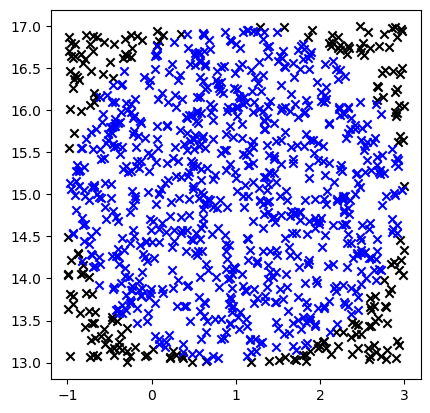

In [3]:
plt.scatter(x_sq,y_sq, marker='x', color='k')
plt.scatter(x_circ,y_circ, marker='x', color='b')
plt.gca().set_aspect('equal')

In [4]:
1e6

1000000.0

In [5]:
np.random.randint(-1,2)

1

In [6]:
for i in range(10):
    print(np.random.uniform(-1,1))

-0.5235352724874014
-0.326655266809756
0.5934988496986198
-0.7733964130430335
-0.9667442265261983
-0.3547528588665696
0.2675673233943281
0.8977800559543212
-0.2722837413151853
-0.6180580755083338


In [7]:
# http://apmonitor.com/pdc/index.php/Main/SolveDifferentialEquations



\begin{align}
\frac{Triangle_A}{Square_A} &= \frac{Triangle_{dots}}{Square_{dots}} \\
Triangle_A &= \frac{Triangle_{dots}}{Square_{dots}} \times Square_A 
\end{align}

In [8]:
xt0, xtl = 0, 2
yt0, ytl = 0, 2
xta = []; yta = []
x = []; y = []
xtat = []; ytat = []
Tdots = 0
Sdots = int(1e3)

def h():
    return np.sqrt(xt**2 + yt**2)

for i in range(Sdots):
    xt = np.random.uniform(xt0,xtl) 
    yt = np.random.uniform(yt0,ytl) 
    x.append( np.random.uniform(xt0,xtl) )
    y.append( np.random.uniform(yt0,ytl) )
    if (yt/xt) <= (ytl/xtl) : # gradient 
        xta.append(xt)
        yta.append(yt)
        Tdots += 1
    else:
        xtat.append(xt)
        ytat.append(yt)

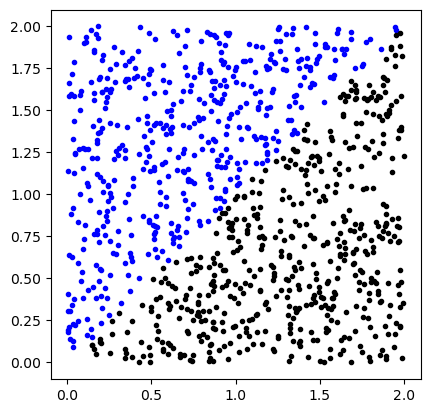

In [9]:
plt.scatter(xtat,ytat, marker='.', color='blue')
plt.scatter(xta,yta, marker='.', color='black')
plt.gca().set_aspect('equal')

In [10]:
TA = (Tdots/Sdots) * (xtl*ytl)
TA

2.108

In [11]:
print("Error = %.2f %%" %(abs(TA - (.5*xtl*ytl))/(.5*xtl*ytl) * 100))

Error = 5.40 %


In [12]:
x = np.arange(-3,3+.1, step=0.1)
y = ( np.exp(-(x)**2))

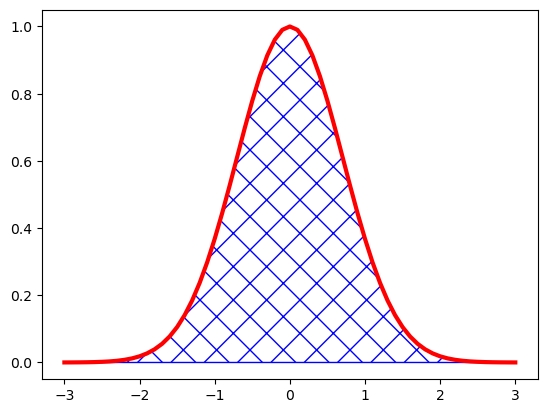

In [13]:
plt.plot(x,y, color="red", lw=3)
plt.fill_between(x,y, hatch="x", color="none", edgecolor="blue")
#plt.gca().set_aspect('equal')

In [14]:
def f(x):
    return np.exp(-(x)**2)

In [15]:
%%timeit -n100 -r100
integrate.quad(f, -3, 3)

57.7 µs ± 11.2 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)


In [23]:
val, err = integrate.quad(f, -3, 3)
print("Scipy Integral = %.2e" %val)

Scipy Integral = 1.77e+00


\begin{align}
I &= \int_a^b g(x) dx \\
I_n &\approx \frac{1}{n} \sum_{i=1}^n I_i \\
&\approx \frac{b-a}{n} \sum_{i=1}^n g(a + (b-a) U_i)
\end{align}

In [17]:
def monte(fxn, a=-3, b=3, N=1000):
    p = []
    for i in range(N):
        p.append(np.random.uniform(a,b))

    integral = 0
    for i in p:
        integral += fxn(i)

    return ((b-a)/N) * integral

In [18]:
%%timeit -n100 -r100
monte(f, -3, 3)

3.1 ms ± 134 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)


In [24]:
intg = monte(f)
print("Monte Integral %.2e" %intg)

Monte Integral 1.77e+00


In [25]:
print("Error = %.2f %%" %(abs(intg - (val))/(val) * 100))

Error = 0.15 %
